In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import seaborn as sns

import src.metrics as metrics
import src.kernels as kernels
import src.bootstrap as boot

# Outliers (level)

In [30]:
def rej_rate_outliers(outlier, n_ls, eps_ls, nreps, dim=1, alpha=0.05):
    res = {oo: {ee: {
        "tilted": {"stat": [], "pval": [], "rej": [], "boot_stats": []},
        "rbf": {"stat": [], "pval": [], "rej": [], "boot_stats": []},
        "tilted_ol_robust": {"nonsq_stat": [], "threshold": [], "rej": []},
    } for ee in eps_ls} for oo in n_ls}
    res["eps_ls"] = eps_ls
    
    for n in n_ls:
        for eps in eps_ls:
            print("eps:", eps)
            ###
            mean1 = np.zeros((dim,)) # data
            mean2 = np.zeros((dim,)) # model
            
            Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
            n_outlier = max(1, int(n * eps))
            Xs[:, :n_outlier] = outlier
        
            score_fn = lambda x: - (x - mean2)
            ###
    
            # tilted
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)

            ksd = metrics.KSD(kernel, score_fn=score_fn)
            wild_boot = boot.WildBootstrap(ksd)
            for X in tqdm(Xs):                
                pval, stat, boot_stats = wild_boot.pval(X, X, return_stat=True, return_boot=True)
                res[n][eps]["tilted"]["stat"].append(stat)
                res[n][eps]["tilted"]["pval"].append(pval)
                res[n][eps]["tilted"]["rej"].append(int(pval < alpha))
                res[n][eps]["tilted"]["boot_stats"].append(boot_stats)
        
            # RBF
            kernel = kernels.RBF(sigma_sq=2.)
            
            ksd = metrics.KSD(kernel, score_fn=score_fn)
            wild_boot = boot.WildBootstrap(ksd)
            for X in tqdm(Xs):                
                pval, stat, boot_stats = wild_boot.pval(X, X, return_stat=True, return_boot=True)
                res[n][eps]["rbf"]["stat"].append(stat)
                res[n][eps]["rbf"]["pval"].append(pval)
                res[n][eps]["rbf"]["rej"].append(int(pval < alpha))
                res[n][eps]["rbf"]["boot_stats"].append(boot_stats)

            # tilted ol robust
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)

            ksd = metrics.KSD(kernel, score_fn=score_fn)
            m0 = int(np.ceil(eps * n))
            threshold = ksd.test_threshold(n=n, m0=m0, alpha=alpha, method="ol_robust")
            for X in tqdm(Xs):
                stat = ksd(X, X, vstat=True) # squared-KSD
                stat = stat**0.5
                res[n][eps]["tilted_ol_robust"]["nonsq_stat"].append(stat)
                res[n][eps]["tilted_ol_robust"]["threshold"].append(threshold)
                res[n][eps]["tilted_ol_robust"]["rej"].append(int(stat > threshold))
    
    return res

In [42]:
np.random.seed(2024)

n = 500
n_ls = [n] # [100, 500, 1000]
eps_ls = [0.1, 0.05, 0.01, 0.005] # [0.01, 0.1]

In [43]:
outlier_ls = [0.1, 1., 10., 100.]
res_ol = {}
for outlier in outlier_ls:
    sub_res_ol = rej_rate_outliers(outlier, n_ls, eps_ls, nreps=100)
    res_ol[outlier] = sub_res_ol

eps: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.005


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.005


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.005


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.005


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

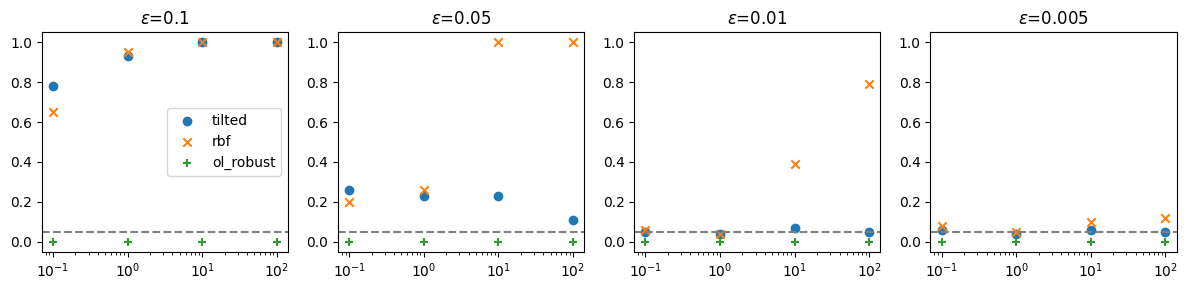

In [44]:
figs, axes = plt.subplots(ncols=len(eps_ls), nrows=1, figsize=(3*len(eps_ls), 3))
            
for j in range(len(eps_ls)):
    ax = axes[j]
    rej_tilted = np.array([np.mean(res_ol[ww][n][eps_ls[j]]["tilted"]["rej"]) for ww in outlier_ls])
    rej_rbf = np.array([np.mean(res_ol[ww][n][eps_ls[j]]["rbf"]["rej"]) for ww in outlier_ls])
    rej_ol_robust = np.array([np.mean(res_ol[ww][n][eps_ls[j]]["tilted_ol_robust"]["rej"]) for ww in outlier_ls])

    ax.scatter(outlier_ls, rej_tilted, label="tilted")
    ax.scatter(outlier_ls, rej_rbf, label="rbf", marker="x")
    ax.scatter(outlier_ls, rej_ol_robust, label="ol_robust", marker="+")
    ax.axhline(0.05, linestyle="--", color="grey")
    ax.set_title(rf"$\epsilon$={eps_ls[j]}")
    ax.set_xscale("log")
    ax.set_ylim(-0.05, 1.05)
    # ax.set_ylabel("")
    # ax.set_xlabel("")
    
axes.flatten()[0].legend()
plt.tight_layout()

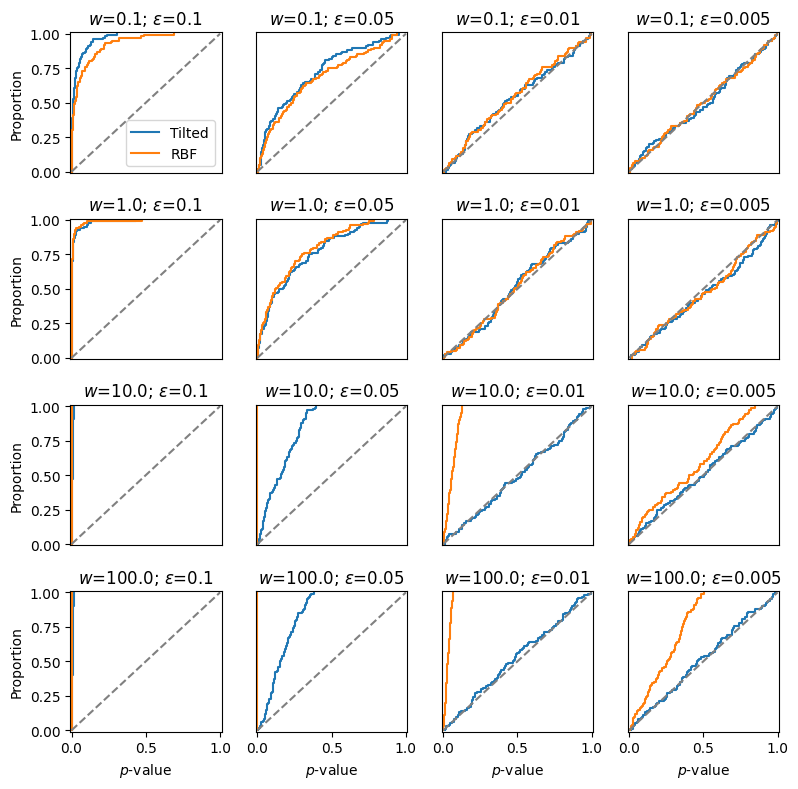

In [45]:
figs, axes = plt.subplots(ncols=len(eps_ls), nrows=len(outlier_ls), figsize=(2*len(eps_ls), 2*len(outlier_ls)))

for i in range(len(outlier_ls)):
    for j in range(len(eps_ls)):
        ax = axes[i][j]
        sns.ecdfplot(ax=ax, x=np.array(res_ol[outlier_ls[i]][n][eps_ls[j]]["tilted"]["pval"]), label="Tilted")
        sns.ecdfplot(ax=ax, x=np.array(res_ol[outlier_ls[i]][n][eps_ls[j]]["rbf"]["pval"]), label="RBF")
        ax.plot([0., 1.], [0., 1.], linestyle="--", color="grey")
        ax.set_xlim(-0.01, 1.01)
        ax.set_ylim(-0.01, 1.01)
        ax.set_title(rf"$w$={outlier_ls[i]}; $\epsilon$={eps_ls[j]}")
        ax.set_ylabel("")
        ax.set_xlabel("")
        
        if i < len(outlier_ls) - 1:
            ax.get_xaxis().set_ticks([])
        if j > 0:
            ax.get_yaxis().set_ticks([])
        if j == 0:
            ax.set_ylabel("Proportion")
        if i == len(outlier_ls) - 1:
            ax.set_xlabel(r"$p$-value")
        # if j == len(eps_ls) - 1:
        #     ax.twinx().set_ylabel(f"eps={eps_ls[j]}")
        #     ax.twinx().get_yaxis().set_ticks([])

axes.flatten()[0].legend(loc="lower right")
plt.tight_layout()

# Mean-shift (power)

In [59]:
def rej_rate_meanshift(mean_ls, n_ls, nreps, eps0, dim=1, alpha=0.05):
    res = {nn: {kk: {
        "tilted": {"stat": [], "pval": [], "rej": [], "boot_stats": []},
        "rbf": {"stat": [], "pval": [], "rej": [], "boot_stats": []},
        "tilted_ol_robust": {"nonsq_stat": [], "threshold": [], "rej": []},
    } for kk in mean_ls} for nn in n_ls}
    res["mean_ls"] = eps_ls
    
    for n in n_ls:
        for mean in mean_ls:
            key = mean
            print("key:", key)
            ###
            mean1 = np.zeros((dim,)) # data
            mean2 = np.reshape([mean], (-1,)) # model
            
            Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
        
            score_fn = lambda x: - (x - mean2)
            ###
    
            # tilted
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)

            ksd = metrics.KSD(kernel, score_fn=score_fn)
            wild_boot = boot.WildBootstrap(ksd)
            for X in tqdm(Xs):                
                pval, stat, boot_stats = wild_boot.pval(X, X, return_stat=True, return_boot=True)
                res[n][key]["tilted"]["stat"].append(stat)
                res[n][key]["tilted"]["pval"].append(pval)
                res[n][key]["tilted"]["rej"].append(int(pval < alpha))
                res[n][key]["tilted"]["boot_stats"].append(boot_stats)
        
            # RBF
            kernel = kernels.RBF(sigma_sq=2.)
            
            ksd = metrics.KSD(kernel, score_fn=score_fn)
            wild_boot = boot.WildBootstrap(ksd)
            for X in tqdm(Xs):                
                pval, stat, boot_stats = wild_boot.pval(X, X, return_stat=True, return_boot=True)
                res[n][key]["rbf"]["stat"].append(stat)
                res[n][key]["rbf"]["pval"].append(pval)
                res[n][key]["rbf"]["rej"].append(int(pval < alpha))
                res[n][key]["rbf"]["boot_stats"].append(boot_stats)

            # tilted ol robust
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)

            ksd = metrics.KSD(kernel, score_fn=score_fn)
            m0 = int(np.ceil(0.01 * n))
            threshold = ksd.test_threshold(n=n, m0=m0, alpha=alpha, method="ol_robust")
            for X in tqdm(Xs):
                stat = ksd(X, X, vstat=True) # squared-KSD
                stat = stat**0.5
                res[n][key]["tilted_ol_robust"]["nonsq_stat"].append(stat)
                res[n][key]["tilted_ol_robust"]["threshold"].append(threshold)
                res[n][key]["tilted_ol_robust"]["rej"].append(int(stat > threshold))
    
    return res

In [71]:
np.random.seed(2024)

n = 500
n_ls = [n]
mean_ls = [0.1, 1., 10., 100.]

In [72]:
res_ms = rej_rate_meanshift(mean_ls=mean_ls, n_ls=n_ls, eps0=0.01, nreps=100)

key: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

key: 1.0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

key: 10.0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

key: 100.0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

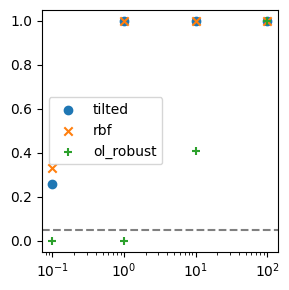

In [74]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3, 3))
            
rej_tilted = np.array([np.mean(res_ms[n][kk]["tilted"]["rej"]) for kk in mean_ls])
rej_rbf = np.array([np.mean(res_ms[n][kk]["rbf"]["rej"]) for kk in mean_ls])
rej_ol_robust = np.array([np.mean(res_ms[n][kk]["tilted_ol_robust"]["rej"]) for kk in mean_ls])

ax.scatter(mean_ls, rej_tilted, label="tilted")
ax.scatter(mean_ls, rej_rbf, label="rbf", marker="x")
ax.scatter(mean_ls, rej_ol_robust, label="ol_robust", marker="+")
ax.axhline(0.05, linestyle="--", color="grey")
ax.set_xscale("log")
ax.set_ylim(-0.05, 1.05)
# ax.set_ylabel("")
# ax.set_xlabel("")

ax.legend()
plt.tight_layout()